In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('diet.csv')

In [ ]:
data=data.drop(['Calorie Deficient/Over'], axis=1)

In [ ]:
data

,step_count,calories_burnt,hours_of_sleep,Weight,Height,calories,BMI,Category
0,5464,181,5,65.78331,125.7833,1950,NaN,NaN
1,6041,197,8,71.51521,136.4873,2600,NaN,NaN
2,25,0,5,69.39874,153.0269,2500,NaN,NaN
3,5461,174,4,68.21660,142.3354,1850,NaN,NaN
4,6915,223,5,67.78781,144.2971,2900,NaN,NaN
...,...,...,...,...,...,...,...,...
91,133,4,2,70.24256,141.4896,1400,NaN,NaN
92,153,0,8,71.48752,140.6104,1550,NaN,NaN
93,500,0,5,69.20477,112.1413,2350,NaN,NaN
94,2127,0,5,70.06306,133.4570,5400,NaN,NaN


In [ ]:
data.iloc[0,3]=30.5
data.iloc[10,3]=20.5
data.iloc[14,3]=28.5
data.iloc[66,3]=22.5
data.iloc[40,3]=20.5
data.iloc[34,3]=29.5
data.iloc[90,3]=20.5

In [ ]:
#data = data.replace('NaN', np.nan) 
data['BMI'] = data['Weight'] / data['Height'].div(100).pow(2)

In [ ]:
data

,step_count,calories_burnt,hours_of_sleep,Weight,Height,calories,BMI,Category
0,5464,181,5,30.50000,125.7833,1950,19.277640,NaN
1,6041,197,8,71.51521,136.4873,2600,38.389631,NaN
2,25,0,5,69.39874,153.0269,2500,29.635757,NaN
3,5461,174,4,68.21660,142.3354,1850,33.671636,NaN
4,6915,223,5,67.78781,144.2971,2900,32.556402,NaN
...,...,...,...,...,...,...,...,...
91,133,4,2,70.24256,141.4896,1400,35.087409,NaN
92,153,0,8,71.48752,140.6104,1550,36.157246,NaN
93,500,0,5,69.20477,112.1413,2350,55.030677,NaN
94,2127,0,5,70.06306,133.4570,5400,39.337466,NaN


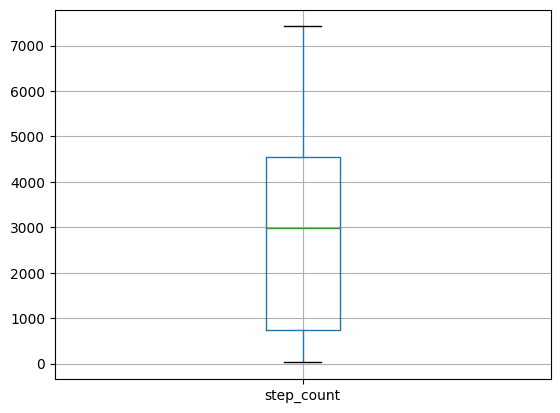

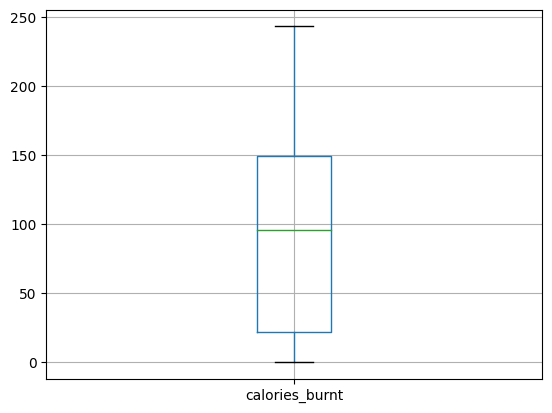

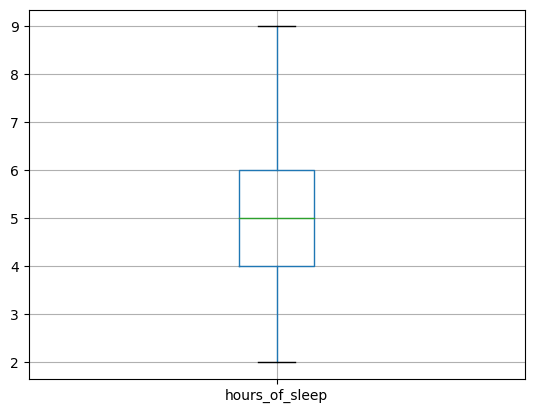

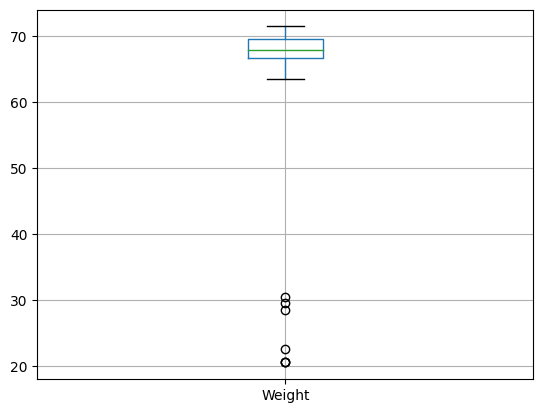

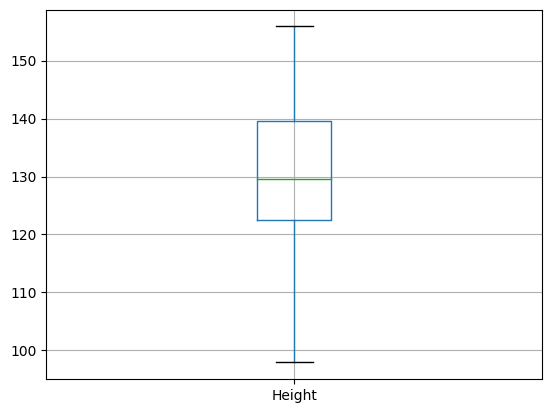

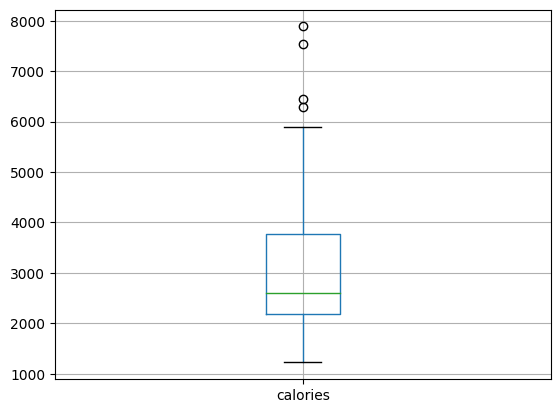

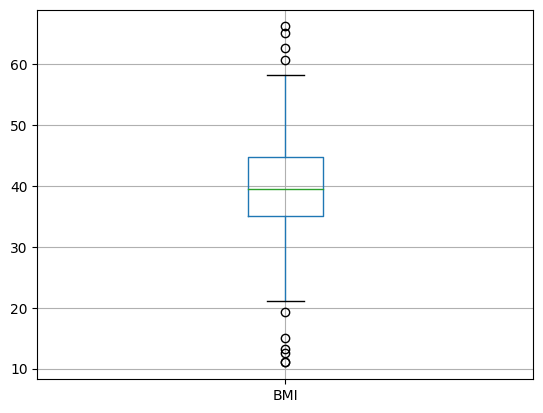

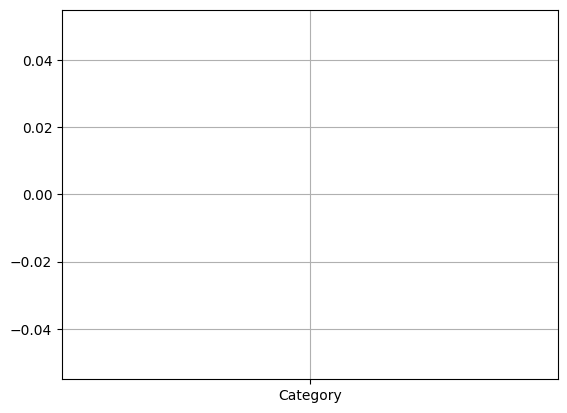

In [ ]:
import matplotlib.pyplot as plt

for column in data:
    plt.figure()
    data.boxplot([column])

In [ ]:
for i in range (0,96):
  if data.iloc[i,6]<20:
    data.iloc[i,7]="Underweight"
  if data.iloc[i,6]>32:
    data.iloc[i,7]="Overweight"
  if data.iloc[i,6]>20 and data.iloc[i,6]<32:
    data.iloc[i,7]="Normal"

In [ ]:
data

,step_count,calories_burnt,hours_of_sleep,Weight,Height,calories,BMI,Category
0,5464,181,5,30.50000,125.7833,1950,19.277640,Underweight
1,6041,197,8,71.51521,136.4873,2600,38.389631,Overweight
2,25,0,5,69.39874,153.0269,2500,29.635757,Normal
3,5461,174,4,68.21660,142.3354,1850,33.671636,Overweight
4,6915,223,5,67.78781,144.2971,2900,32.556402,Overweight
...,...,...,...,...,...,...,...,...
91,133,4,2,70.24256,141.4896,1400,35.087409,Overweight
92,153,0,8,71.48752,140.6104,1550,36.157246,Overweight
93,500,0,5,69.20477,112.1413,2350,55.030677,Overweight
94,2127,0,5,70.06306,133.4570,5400,39.337466,Overweight


In [ ]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
y=data['Category']

In [ ]:
X = data.drop(['Category'],axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train_resampled,y_train_resampled)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
y_train_resampled.value_counts()

Overweight     58
Normal         58
Underweight    58
Name: Category, dtype: int64

In [ ]:
y_train.shape

(67,)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

# Predict the classes of test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Measure the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7241379310344828


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_clf.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the testing data
y_pred = gb_clf.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")







Accuracy: 1.0


ADA Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Create an AdaBoost Classifier with default parameters
ada_clf = AdaBoostClassifier(random_state=42)

# Fit the model to the training data
ada_clf.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the testing data
y_pred = ada_clf.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")


Accuracy: 1.0


In [ ]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app1.py

import numpy as np
import pickle
import pandas as pd
#from flasgger import Swagger
import streamlit as st
pickle_in = open("classifier.pkl","rb")
classifier=pickle.load(pickle_in)
def welcome():
    return "Welcome All"
def predict_note_authentication(	step_count,	calories_burnt,	hours_of_sleep,	Weight,	Height,	calories,	BMI):
    
    """Let's Authenticate the Banks Note 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: step_count
        in: query
        type: number
        required: true
      - name: calories_burnt
        in: query
        type: number
        required: true
      - name: hours_of_sleep
        in: query
        type: number
        required: true
      - name: Weight
        in: query
        type: number
        required: true
      - name: Height
        in: query
        type: number
        required: true
      - name: calories
        in: query
        type: number
        required: true
      - name: BMI
        in: query
        type: number
        required: true
      
    responses:
        200:
            description: The output values
        
    """
    prediction=classifier.predict([[	step_count,	calories_burnt,	hours_of_sleep,	Weight,	Height,	calories,	BMI]])
    print(prediction)
    
    return prediction

def predict(	step_count,	calories_burnt,	hours_of_sleep,	Weight,	Height,	calories,	BMI):
    
    """Let's Authenticate the Banks Note 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: step_count
        in: query
        type: number
        required: true
      - name: calories_burnt
        in: query
        type: number
        required: true
      - name: hours_of_sleep
        in: query
        type: number
        required: true
      - name: Weight
        in: query
        type: number
        required: true
      - name: Height
        in: query
        type: number
        required: true
      - name: calories
        in: query
        type: number
        required: true
      - name: BMI
        in: query
        type: number
        required: true
    
    responses:
        200:
            description: The output values
        
    """
    prediction=classifier.predict([[	step_count,	calories_burnt,	hours_of_sleep,	Weight,	Height,	calories,	BMI]])
    if prediction == 0:
        predictionText = "Mitochondrial genetic inheritance disorders"
    elif prediction == 1:
        predictionText = "Multifactorial genetic inheritance disorders"
    elif prediction == 2:
        predictionText = "Single-gene inheritance diseases"
    else:
        predictionText = "Error"
    print(predictionText)
    
    
    
    return predictionText
def main():
    st.title("Genetic disorder classification")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit classification app </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    step_count = st.text_input("step_count","Type Here")
    calories_burnt = st.text_input("calories_burnt","Type Here")
    hours_of_sleep = st.text_input("hours_of_sleep","Type Here")
    Weight = st.text_input("Weight","Type Here")
    Height = st.text_input("Height","Type Here")
    calories= st.text_input("calories","Type Here")
    BMI = st.selectbox('BMI',('1', '0'))
 



    result=""
    if st.button("Predict"):
        result=predict_note_authentication(	step_count,	calories_burnt,	hours_of_sleep,	Weight,	Height,	calories,	BMI)
    st.success('The output is {}'.format(result))
    if st.button("genetic_disorder"):
        result=predict(	step_count,	calories_burnt,	hours_of_sleep,	Weight,	Height,	calories,	BMI)
    st.success('The output is {}'.format(result))

   

if __name__=='__main__':
    main()

Overwriting app1.py


In [ ]:
!streamlit run app1.py & npx localtunnel --port 8501

[##................] | loadDep:strip-ansi: sill resolveWithNewModule wrap-ansi@


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.130.90:8501

npx: installed 22 in 5.432s
your url is: https://three-shirts-search-34-139-130-90.loca.lt
